<a href="https://colab.research.google.com/github/Manas-P/forecasting_co2_emission_threshold/blob/main/Forecast_co2_threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
url='https://raw.githubusercontent.com/Manas-P/forecasting_co2_emission_threshold/main/emission_dataset.csv'
df=pd.read_csv(url)

In [51]:
df.head()

,Date,Amount
0,2010-01,101
1,2010-02,106
2,2010-03,110
3,2010-04,113
4,2010-05,117


In [52]:
df.tail()

,Date,Amount
127,2020-08,217
128,2020-09,216
129,2020-10,214
130,2020-11,213
131,2020-12,210


In [53]:
df.columns=["Month","CO Amount (g/mile)"] #Change Title
df.head()

,Month,CO Amount (g/mile)
0,2010-01,101
1,2010-02,106
2,2010-03,110
3,2010-04,113
4,2010-05,117


In [54]:
df['Month']=pd.to_datetime(df['Month']) #Converted Month into Datetime

In [55]:
df.head()

,Month,CO Amount (g/mile)
0,2010-01-01,101
1,2010-02-01,106
2,2010-03-01,110
3,2010-04-01,113
4,2010-05-01,117


In [56]:
df.set_index('Month',inplace=True) #Set month column as index

In [57]:
df.head()

,CO Amount (g/mile)
Month,
2010-01-01,101
2010-02-01,106
2010-03-01,110
2010-04-01,113
2010-05-01,117


In [58]:
df.describe()

,CO Amount (g/mile)
count,132.000000
mean,163.575758
std,32.008854
min,101.000000
25%,137.000000
50%,164.000000
75%,190.000000
max,220.000000


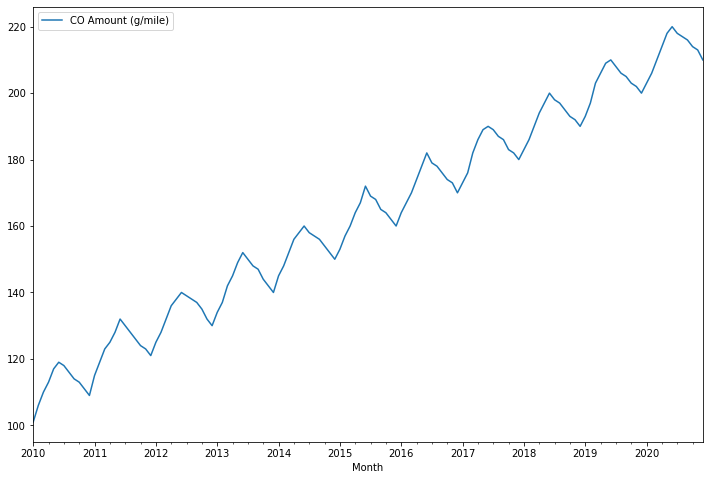

In [59]:
df.plot(figsize=(12,8))

In [60]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [61]:
test_result=adfuller(df['CO Amount (g/mile)'])

In [62]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(co):
    result=adfuller(co)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [63]:
adfuller_test(df['CO Amount (g/mile)'])

ADF Test Statistic : -1.0362190287752304
p-value : 0.7398261640826027
#Lags Used : 12
Number of Observations Used : 119
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [64]:
#Differencing
df['CO First Difference'] = df['CO Amount (g/mile)'] - df['CO Amount (g/mile)'].shift(1)

In [65]:
df['CO Amount (g/mile)'].shift(1)

Month
2010-01-01      NaN
2010-02-01    101.0
2010-03-01    106.0
2010-04-01    110.0
2010-05-01    113.0
              ...  
2020-08-01    218.0
2020-09-01    217.0
2020-10-01    216.0
2020-11-01    214.0
2020-12-01    213.0
Name: CO Amount (g/mile), Length: 132, dtype: float64

In [66]:
df['Seasonal First Difference']=df['CO Amount (g/mile)']-df['CO Amount (g/mile)'].shift(12)

In [67]:
df.head(14)

,CO Amount (g/mile),CO First Difference,Seasonal First Difference
Month,,,
2010-01-01,101,NaN,NaN
2010-02-01,106,5.0,NaN
2010-03-01,110,4.0,NaN
2010-04-01,113,3.0,NaN
2010-05-01,117,4.0,NaN
2010-06-01,119,2.0,NaN
2010-07-01,118,-1.0,NaN
2010-08-01,116,-2.0,NaN
2010-09-01,114,-2.0,NaN


In [68]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.323680134668757
p-value : 0.00040408830330657786
#Lags Used : 12
Number of Observations Used : 107
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


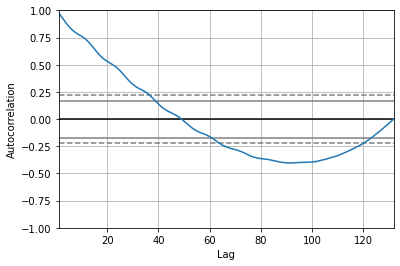

In [70]:
# Auto Regressive modal
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['CO Amount (g/mile)'])
plt.show()

In [71]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

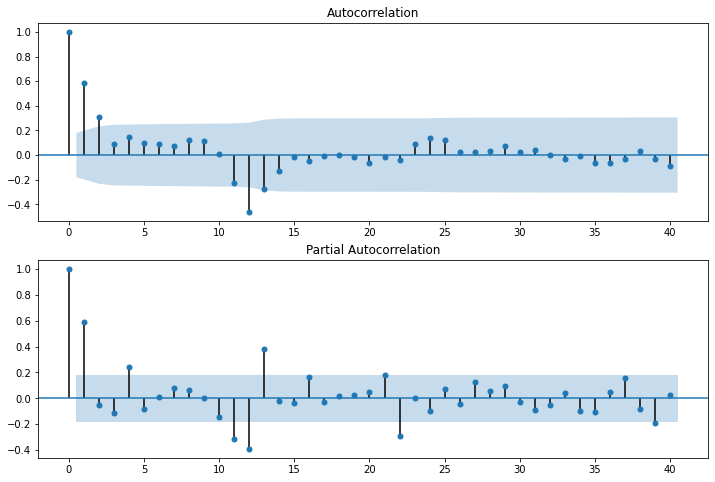

In [72]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [73]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# For non-seasonal data
model=ARIMA(df['CO Amount (g/mile)'],order=(1,1,1))
model_fit=model.fit()

In [75]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                               
================================================================================
Dep. Variable:     D.CO Amount (g/mile)   No. Observations:                  131
Model:                   ARIMA(1, 1, 1)   Log Likelihood                -315.607
Method:                         css-mle   S.D. of innovations              2.668
Date:                  Sat, 18 Dec 2021   AIC                            639.214
Time:                          23:12:52   BIC                            650.715
Sample:                      02-01-2010   HQIC                           643.887
                           - 12-01-2020                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.8285      0.038     21.883      0.000       0.754       0.903
ar.L1.D.CO Amount (g/mile)     0.8589      0.051     16.898      0.000       0.759       0.959
ma.L1.D.CO Amount (g/mile)    -1.0000      0.020    -50.920      0.000      -1.038      -0.961
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1642           +0.0000j            1.1642            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

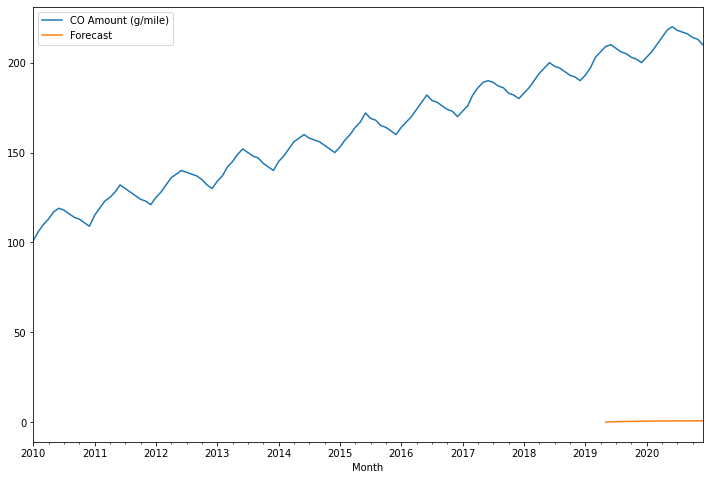

In [76]:
df['Forecast']=model_fit.predict(start=112,end=131,dynamic=True)
df[['CO Amount (g/mile)','Forecast']].plot(figsize=(12,8))

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['CO Amount (g/mile)'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

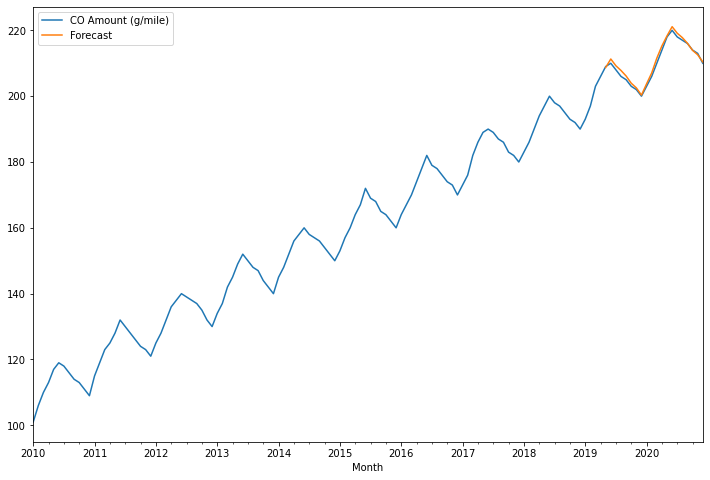

In [79]:
df['Forecast']=results.predict(start=112,end=131,dynamic=True)
df[['CO Amount (g/mile)','Forecast']].plot(figsize=(12,8))

In [80]:
#To find future
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,96)] #Given upto 8 years

In [81]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns) #Future values

In [82]:
future_datest_df.tail()

,CO Amount (g/mile),CO First Difference,Seasonal First Difference,Forecast
2028-07-01,NaN,NaN,NaN,NaN
2028-08-01,NaN,NaN,NaN,NaN
2028-09-01,NaN,NaN,NaN,NaN
2028-10-01,NaN,NaN,NaN,NaN
2028-11-01,NaN,NaN,NaN,NaN


In [83]:
future_df=pd.concat([df,future_datest_df]) #Concatenate current dataset to future dataset

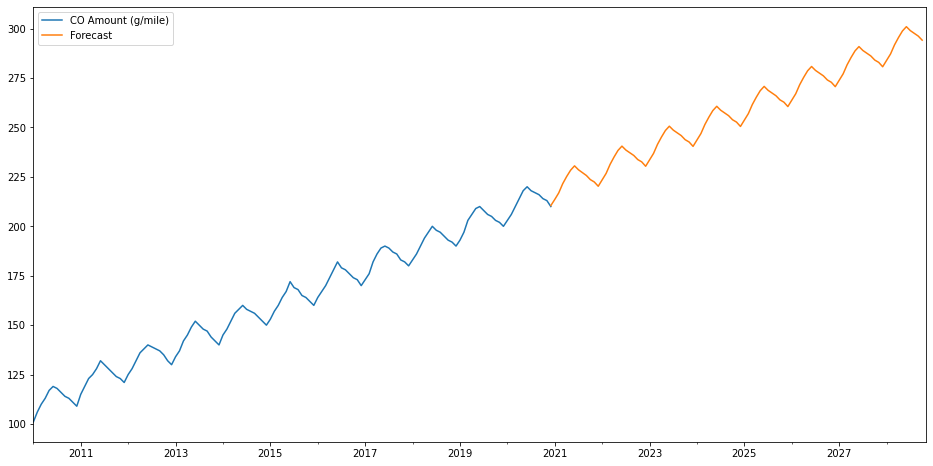

In [84]:
future_df['Forecast'] = results.predict(start = 131, end = 225, dynamic= True)   
future_df[['CO Amount (g/mile)', 'Forecast']].plot(figsize=(16, 8)) 

In [85]:
#Predicting the year when the co2 emission will exceed the limit
df_new = future_df[future_df['Forecast'] >= 250].index[0]
print("Your vehicle will emit harmfull gas at the year of: ",df_new)

Your vehicle will emit harmfull gas at the year of:  2023-06-01 00:00:00
